# Histograms, Binnings, and Density

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Histograms

`plt.hist()`

In [15]:
a = np.random.randint(0, 10, size=10)
a

array([8, 7, 0, 3, 3, 1, 1, 1, 2, 8])

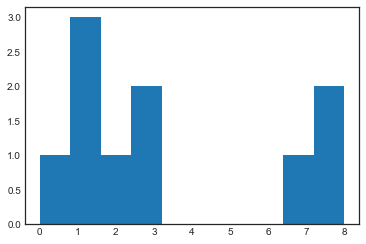

In [18]:
stats = plt.hist(a)

(array([  6.,  20.,  90., 175., 254., 223., 134.,  71.,  23.,   4.]),
 array([-2.90972731, -2.30158977, -1.69345223, -1.08531469, -0.47717716,
         0.13096038,  0.73909792,  1.34723546,  1.955373  ,  2.56351054,
         3.17164807]),
 <a list of 10 Patch objects>)

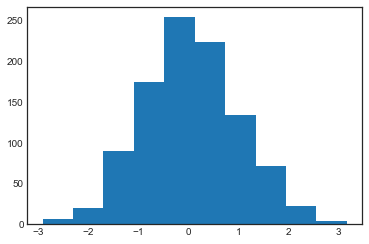

In [2]:
data = np.random.randn(1000)
plt.hist(data)

The `hist()` function has many options to tune both the calculation and the display

(array([0.01479928, 0.01479928, 0.        , 0.02959857, 0.01973238,
        0.04933095, 0.06906332, 0.16279212, 0.21212307, 0.22198926,
        0.29105258, 0.35024972, 0.39958066, 0.42917923, 0.42424613,
        0.37984828, 0.3601159 , 0.3601159 , 0.26145401, 0.24665473,
        0.15292593, 0.18745759, 0.0937288 , 0.06906332, 0.05919714,
        0.04439785, 0.00986619, 0.01479928, 0.        , 0.00493309]),
 array([-2.90972731, -2.7070148 , -2.50430228, -2.30158977, -2.09887726,
        -1.89616475, -1.69345223, -1.49073972, -1.28802721, -1.08531469,
        -0.88260218, -0.67988967, -0.47717716, -0.27446464, -0.07175213,
         0.13096038,  0.3336729 ,  0.53638541,  0.73909792,  0.94181043,
         1.14452295,  1.34723546,  1.54994797,  1.75266049,  1.955373  ,
         2.15808551,  2.36079802,  2.56351054,  2.76622305,  2.96893556,
         3.17164807]),
 <a list of 1 Patch objects>)

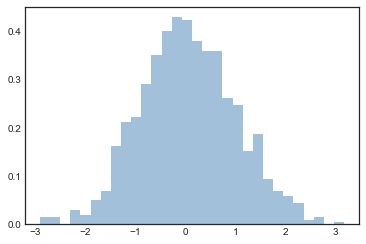

In [8]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

The combination of `histtype='stepfilled'` along with some transparency `alpha` is very useful when comparing histograms of several distributions:

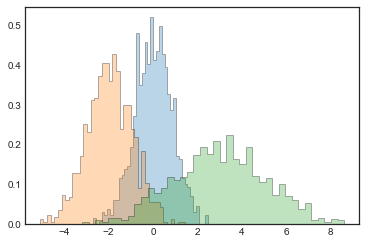

In [21]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, 
              density=True, bins=40, edgecolor='k')

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, use the `np.histogram()` function:

In [22]:
counts, bin_edges = np.histogram(data, bins=5)
counts

array([ 26, 265, 477, 205,  27])

## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.

In [23]:
mean = [0, 0]
cov = [[1, 1], 
       [1, 2]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

### `plt.hist2d`: Two dimensional histogram

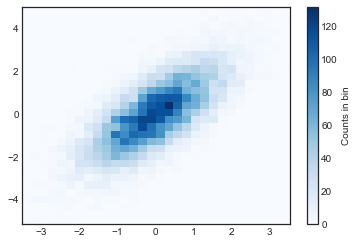

In [24]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Counts in bin')

- Just as with `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binning. (See function doctoring)

-  Just as `plt.hist` has a counterpart in `np.histogram`, `plt.hist2d` has a counterpart in `np.histogram2d`, which can be used as follows:

In [25]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### `plt.hexbin`: Hexagonal binnings

Another natural shape for such a tesselation is the regular hexagon.

`plt.hexbin`: represents a two-dimensional dataset binned within a grid of hexagons

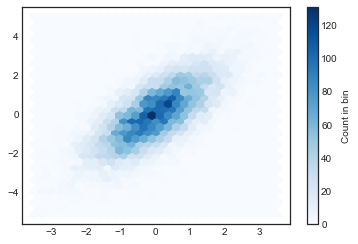

In [26]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
plt.colorbar(label='Count in bin')

### kernel density estimation

Another common method of evaluating densities in multiple dimensions is kernel density estimation (KDE).
KDE can be simply thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function. 

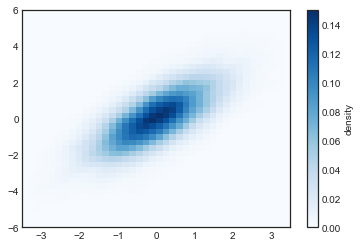

In [53]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
x_grid = np.linspace(-3.5, 3.5, 40)
y_grid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(x_grid, y_grid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower',
           aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')

cb = plt.colorbar(label='density')

In [67]:
a = np.arange(4).reshape((2, 2))
a

array([[0, 1],
       [2, 3]])

In [68]:
a.flatten()

array([0, 1, 2, 3])

In [69]:
a.flatten()[0] = 1
a

array([[0, 1],
       [2, 3]])

In [71]:
a.ravel()

array([0, 1, 2, 3])

In [72]:
a.ravel()[0] = 1
a

array([[1, 1],
       [2, 3]])

In [59]:
a.reshape(-1)

array([0, 1, 2, 3])